# First Ubermag notebook

The goal of this tutorial is to familiarise users with basics of running Ubermag simulations in Jupyter notebook. The only thing you need to know for this tutorial is how to execute individual cells: this is done by pressing `Shift` + `Return` (`Return` = `Enter`).

## Simple Ubermag simulation

Before we specify and run the simulation, we have to import Ubermag modules we intend to use. Because we are going to run Mumax3 simulations, we will import `mumax3c` and for creating finite diference fields, we are going to import `discretisedfield`.

In [1]:
import discretisedfield as df
import micromagneticmodel as mm

import mumax3c as mc

# The following line enables plotting inside the notebook.
%matplotlib inline

### System

The object on which different drivers act on in Ubermag is `mumax3c.System`. In order to define the micromagnetic system we intend to simulate, we have to specify:

1. Hamiltonian,
2. Dynamics equation,
3. Magnetisation configuration.

In [2]:
system = mm.System(name="first_ubermag_simulation")

#### Hamiltonian

The Hamiltonian for the first Ubermag simulaton is very simple and contains only:

1. exchange,
2. demagnetisation,
3. Zeeman energy terms.

We will apply an external magnetic field in the $x$-direction for the purpose of this demonstration:

In [3]:
A = 1e-12  # exchange energy constant (J/m)
H = (5e6, 0, 0)  # external magnetic field in the x-direction (A/m)
system.energy = mm.Exchange(A=A) + mm.Demag() + mm.Zeeman(H=H)

#### Dynamics equation

The dynamics equation contains only precession and damping terms:

In [4]:
gamma0 = 2.211e5  # gyrotropic ratio parameter (m/As)
alpha = 0.2  # Gilbert damping
system.dynamics = mm.Precession(gamma0=gamma0) + mm.Damping(alpha=alpha)

#### Initial magnetisation

We initialise the system in positive $y$-direction, i.e. (0, 1, 0), which is different from the equlibrium state we expect for the external Zeeman field applied in $x$ direction:

In [5]:
L = 100e-9  # cubic sample edge length (m)
d = 5e-9  # discretisation cell size (m)
mesh = df.Mesh(p1=(0, 0, 0), p2=(L, L, L), cell=(d, d, d))

Ms = 8e6  # saturation magnetisation (A/m)
system.m = df.Field(mesh, nvdim=3, value=(0, 1, 0), norm=Ms)

### Inspect the properties of the system

We can check the characteristics of the system we defined by asking objects to represent themselves:

In [6]:
mesh.k3d()

Output()

In [7]:
system.energy

Exchange(A=1e-12) + Demag() + Zeeman(H=(5000000.0, 0, 0))

In [8]:
system.dynamics

Precession(gamma0=221100.0) + Damping(alpha=0.2)

We can also visualise the current magnetisation field (using MatPlotLib=`mpl`):

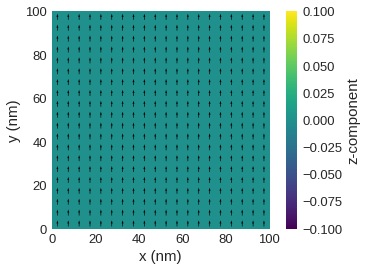

In [9]:
system.m.sel("z").mpl()

And we can visualise the same data using `k3d.vectors` - this is more suitable for interactive exploration:

In [10]:
system.m.sel(z=(L / 2, L / 2)).k3d.vector(head_size=20)

Output()

### Driving the system

After the system object is created, we can minimise its energy (relax it) using the Relax Driver (`RelaxDriver`).

In [11]:
md = mc.RelaxDriver()
md.drive(system)

Running mumax3 (ExeMumax3Runner)[2022/06/22 11:25]... (0.5 s)


The system is now relaxed, and we can plot its slice and compute its average magnetisation.

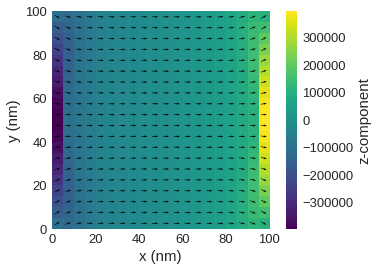

In [12]:
system.m.sel("z").mpl()

The energy can also be minised using using the Minimisation Driver (`MinDriver`). However, for `mumax3` this is not as robust as the `RelaxDriver`.

Running mumax3 (ExeMumax3Runner)[2022/06/22 11:25]... (0.2 s)


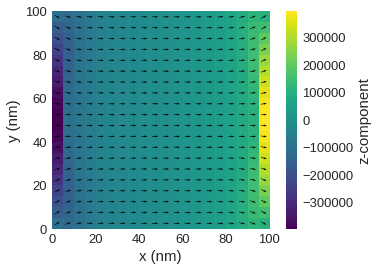

In [13]:
md = mc.MinDriver()
md.drive(system)
system.m.sel("z").mpl()

In [14]:
system.m.sel(z=(L / 2, L / 2)).k3d.vector(color_field=system.m.z, head_size=20)

Output()

In [15]:
system.m.mean()

(7851076.102308705, 0.0014681704001268372, 0.00463490368827479)

We can see that the magnetisation is aligned along the $x$-direction, as expected having in mind we applied the external magnetic field in that direction.